Exercise 4

In [5]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [6]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int
    number3: int
    operation2: str
    number4: int
    finalNumber2: int

In [7]:
def adder(state: AgentState) -> AgentState:
    print("adder")
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    print("subtractor")
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        print("SUB 1")
        return "subtraction_operation"

def adder2(state: AgentState) -> AgentState:
    print("adder1")
    state["finalNumber2"] = state["number3"] + state["number4"]
    print(state["finalNumber2"])
    return state

def subtractor2(state: AgentState) -> AgentState:
    print("subtractor1")
    state["finalNumber2"] = state["number3"] - state["number4"]
    print(state["finalNumber2"])
    return state

def decide_next_node1(state: AgentState) -> AgentState:
    if state["operation2"] == "+":
        print("ADD1")
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [8]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node",
    },
)

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node1,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2",
    },
)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

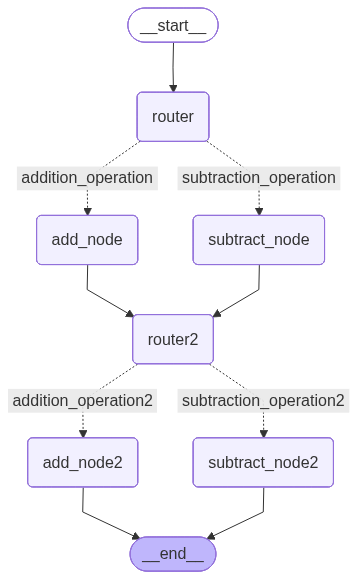

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
initial_state = AgentState(
    number1=10,
    operation="-",
    number2=5,
    number3=7,
    number4=2,
    operation2="+",
    finalNumber=0,
    finalNumber2=0,
)

In [11]:
print(app.invoke(initial_state))

SUB 1
subtractor
ADD1
adder1
9
{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber2': 9}
